In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("Male_Married_Rejection").getOrCreate()

In [3]:
query= "(WITH total_applications AS \
        (SELECT Married, Gender, COUNT(*) AS total \
        FROM cdw_sapp_loan_application \
        WHERE Gender = 'Male' \
	    GROUP BY Married), \
        rejected_applications AS ( \
        SELECT Married, Gender, COUNT(*) AS SUM1 \
        FROM cdw_sapp_loan_application \
        WHERE application_status = 'N' AND Gender = 'Male' \
        GROUP BY Married) \
        SELECT rejected_applications.Married, rejected_applications.Gender, \
        round((rejected_applications.SUM1 / total_applications.total) * 100, 2) AS rejected_percentage \
        FROM total_applications \
        INNER JOIN rejected_applications ON rejected_applications.Married = total_applications.Married) as Reject_mm"

sdf_mm = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_mm.show()

+-------+------+-------------------+
|Married|Gender|rejected_percentage|
+-------+------+-------------------+
|     No|  Male|              37.72|
|    Yes|  Male|              28.43|
+-------+------+-------------------+



In [6]:
#Convert spark dataframe to pandas dataframe
pdf_mm = sdf_mm.toPandas()
pdf_mm.set_index(['Married', 'Gender'], inplace = True)
pdf_mm['rejected_percentage'].dtype
pdf_mm['rejected_percentage'] = pdf_mm['rejected_percentage'].astype(float)
pdf_mm

,,rejected_percentage
Married,Gender,
No,Male,37.72
Yes,Male,28.43


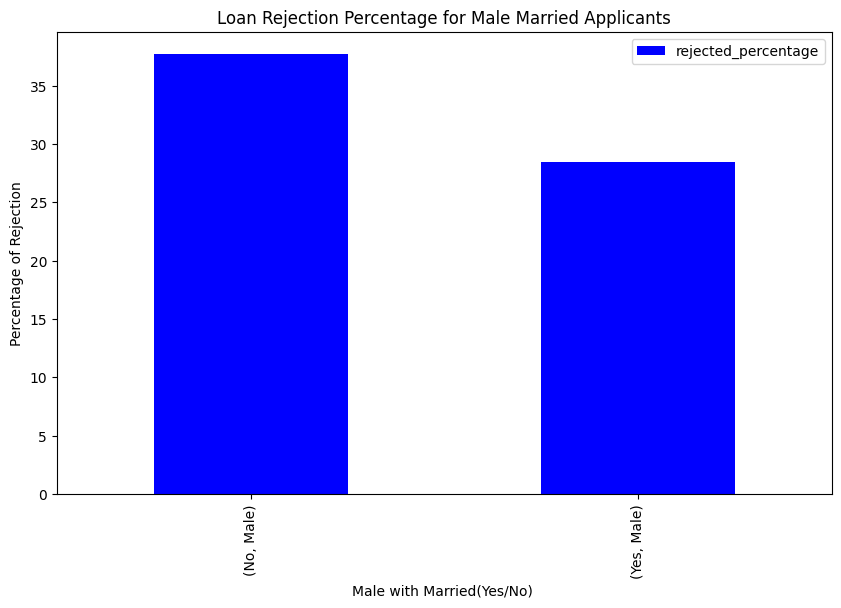

In [8]:
pdf_mm.plot(kind='bar', figsize=(10, 6), color = 'blue')
plt.xlabel('Male with Married(Yes/No) ')
plt.ylabel('Percentage of Rejection')
plt.title('Loan Rejection Percentage for Male Married Applicants')
plt.show()